 # LetsGrowMore VIP Programme
 ## Data Science Internship
 ### 02 Intermediate Level Task - Prediction Using Decision Tree Algorithm

## Data Collection and Loading

In [45]:
# Importing the required dependencies or libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
pyo.init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [46]:
# Importing and reading the Iris.csv dataset
iris_data = pd.read_csv('./Data/Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Analysis

In [47]:
# Displaying the first 10 rows of the dataset
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [48]:
# Displaying the last 10 rows of the dataset
iris_data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [49]:
# Get basic understanding of the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
# Remove the 'Id' column from the dataset as its irrelavent for further analysis
# Renaming the columns for convenience
iris_data.drop(['Id'], axis=1, inplace=True)
iris_data.rename(
    columns={
        'SepalLengthCm': 'SepalLength',
        'SepalWidthCm': 'SepalWidth',
        'PetalLengthCm': 'PetalLength',
        'PetalWidthCm': 'PetalWidth'
    }, inplace=True)
iris_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
# No. of rows and columns respectively in the dataset
iris_data.shape

(150, 5)

In [52]:
# Checks whether the dataset contains any missing values or not
# 0 - Doesn't contain missing values
# 0 < - Contains missing values
iris_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [53]:
# Checks whether the dataset contains any NaN values or not
# 0 - Doesn't contain NaN values
# 0 < - Contains NaN values
iris_data.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [54]:
# Displays the various statistical measures of the dataset
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
# Displays the number of unique data for each columns of the dataframe
iris_data.nunique()

SepalLength    35
SepalWidth     23
PetalLength    43
PetalWidth     22
Species         3
dtype: int64

In [56]:
# Diaplaying the elements of the 'class' column
# Alternatively, "data['class']" can also be used
iris_data['Species'].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [57]:
# Displaying the unique elements of the 'class' column
print(iris_data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [58]:
# Displaying the number of values for each element of the 'class' column
iris_data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [59]:
# Displaying the number of unique elements of the 'class' column
iris_data['Species'].nunique()

3

In [60]:
# Maximum values in each columns (will skip NA values and won't include non-numeric values)
iris_data.max(skipna=True, numeric_only=True)

SepalLength    7.9
SepalWidth     4.4
PetalLength    6.9
PetalWidth     2.5
dtype: float64

In [61]:
# Minimum values in each columns (will skip NA values and won't include non-numeric values)
iris_data.min(skipna=True, numeric_only=True)

SepalLength    4.3
SepalWidth     2.0
PetalLength    1.0
PetalWidth     0.1
dtype: float64

In [62]:
# For future references
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualization

<AxesSubplot:xlabel='Species', ylabel='PetalWidth'>

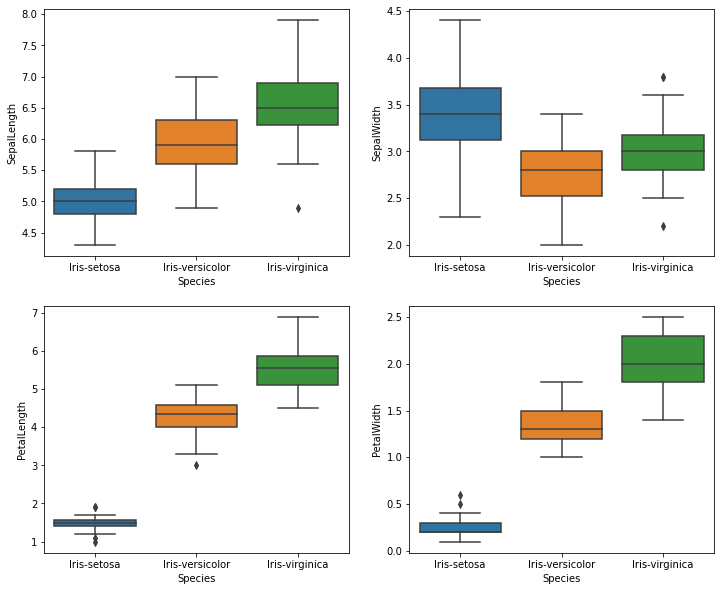

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], data=iris_data, x='Species', y='SepalLength')
sns.boxplot(ax=axes[0, 1], data=iris_data, x='Species', y='SepalWidth')
sns.boxplot(ax=axes[1, 0], data=iris_data, x='Species', y='PetalLength')
sns.boxplot(ax=axes[1, 1], data=iris_data, x='Species', y='PetalWidth')

<AxesSubplot:xlabel='PetalWidth', ylabel='Density'>

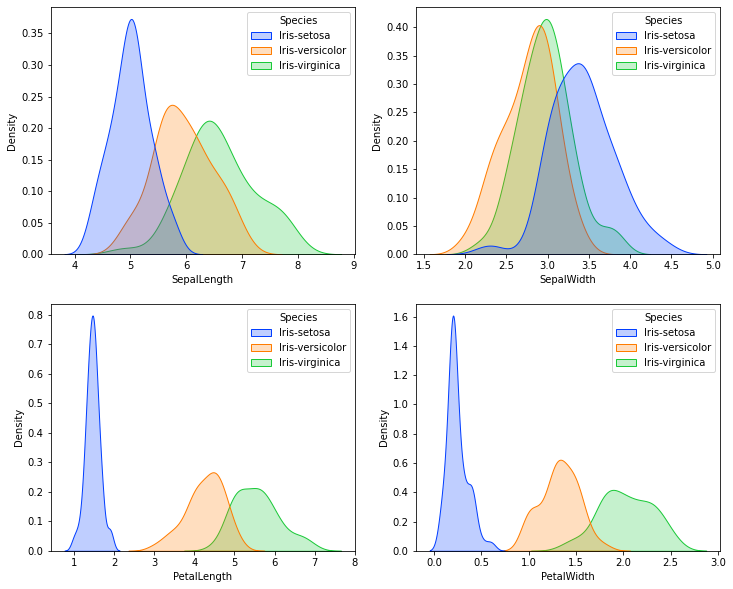

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.kdeplot(ax=axes[0, 0], data=iris_data, x='SepalLength', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])
sns.kdeplot(ax=axes[0, 1], data=iris_data, x='SepalWidth', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])
sns.kdeplot(ax=axes[1, 0], data=iris_data, x='PetalLength', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])
sns.kdeplot(ax=axes[1, 1], data=iris_data, x='PetalWidth', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])

In [65]:
px.scatter(iris_data, x='Species', y='SepalLength', size='SepalLength')

In [66]:
px.scatter(iris_data, x='Species', y='SepalWidth', size='SepalWidth')

In [67]:
px.scatter(iris_data, x='Species', y='PetalLength', size='PetalLength')

In [71]:
px.scatter(iris_data, x='Species', y='PetalWidth', size='PetalWidth')

In [72]:
px.scatter_matrix(iris_data, color='Species', dimensions=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',])